# Covid Plots

I wanted to test out using jupyter notebook to show off some plotly graphs. So here goes. 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from covid_alberta import *

In [ ]:
abC19scaper = albertaC19_webscraper()

In [ ]:
abTotal, abRegion, abTesting = abC19scaper.scrape_all(return_dataframes=True)

In [ ]:
abTesting

,test_count
2020-01-24,1
2020-01-27,1
2020-01-28,8
2020-01-30,3
2020-02-03,7
...,...
2020-04-03,1532
2020-04-04,1740
2020-04-05,1113
2020-04-06,1131


In [ ]:
region_dt = alberta_stats.calculate_doublingtimes_region(abRegion, col_suffix='cumulative', combine_df=False)
total_dt = alberta_stats.calculate_doublingtimes_region(abTotal, col_suffix='cum_cases', combine_df=False)

all_data = abTotal.join([total_dt, abRegion, region_dt, abTesting])
all_data.rename(columns={'Daily_count': 'Ab_cases', 
                         'cum_cases':'Ab_cumCases', 
                         'dtime':'Ab_dtime', 
                         'dtime_rw':'Ab_dtime_rw'}, inplace=True)

In [ ]:
all_data.columns

Index(['Ab_cumCases', 'Confirmed_count', 'Probable_count', 'Ab_cases',
       'Active_cum', 'Died_cum', 'Recovered_cum', 'Ab_dtime', 'Ab_dtime_rw',
       'Calgary_cumulative', 'Central_cumulative', 'Edmont_cumulative',
       'North_cumulative', 'South_cumulative', 'Unknown_cumulative',
       'Calgary_dtime', 'Calgary_dtime_rw', 'Central_dtime',
       'Central_dtime_rw', 'Edmont_dtime', 'Edmont_dtime_rw', 'North_dtime',
       'North_dtime_rw', 'South_dtime', 'South_dtime_rw', 'Unknown_dtime',
       'Unknown_dtime_rw', 'test_count'],
      dtype='object')

In [ ]:
all_data

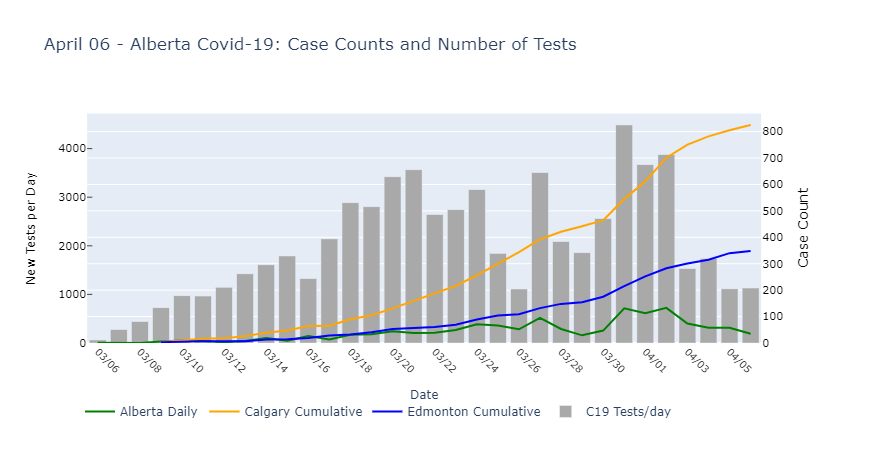

In [ ]:
# Set up the defaults and the data
ln_width = 2
days_to_trim = 1
mode = 'lines'
trace_formats = {'Ab_cases': {'mode': mode,
                                 'line': {'color': 'green', 'width':ln_width},
                                 'name': 'Alberta Daily'}, 
                 'Calgary_cumulative': {'mode': mode,
                                      'line': {'color': 'orange', 'width':ln_width},
                                      'name': 'Calgary Cumulative'},  
                 'Edmont_cumulative': {'mode': mode,
                                     'line': {'color': 'blue', 'width':ln_width},
                                     'name': 'Edmonton Cumulative'}
                } 
plot_data = all_data[:-days_to_trim]
updated = plot_data.index[-1].strftime("%B %d")
# Create the plot
data = list()
date_fmt = "%m/%d"
for key in trace_formats.keys():
    data.append(go.Scatter(x=plot_data.index.strftime(date_fmt), y=plot_data[key],
                             mode=trace_formats[key]['mode'], line=trace_formats[key]['line'],
                             name=trace_formats[key]['name'],
                             )
                )
data.append(go.Bar(x=plot_data.index.strftime(date_fmt),  y=plot_data['test_count'],
                     name='C19 Tests/day', yaxis='y2', marker={'color':'darkgrey'}))
layout = go.Layout(title=f'{updated} - Alberta Covid-19: Case Counts and Number of Tests',
                    xaxis=dict(domain=[0.01, 0.95], title='Date', titlefont={'size': 12}, 
                               rangemode='nonnegative', tick0=0, dtick=2, tickangle=45,
                               tickfont={'color':'black', 'size':10}),
                    yaxis=dict(title='Case Count', titlefont=dict(color='black'), 
                               tickfont={'color':'black', 'size':11}, overlaying='y2', side='right',
                               rangemode='nonnegative', tick0=0, dtick=100),
                    yaxis2=dict(domain=[0.1, 0.95], title='New Tests per Day', titlefont={'size': 12, 'color':'black'}, 
                                tickfont={'color':'black', 'size':11}, showgrid=False,
                                anchor='x', side='left', rangemode='nonnegative', ticks='inside'),
                    legend_orientation="h", hovermode='x')
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_html('images/daily_cases.html')

In [ ]:
all_data.columns

Index(['Ab_cases', 'Ab_cumCases', 'Ab_dtime', 'Ab_dtime_rw',
       'Calgary_newCases', 'Central_newCases', 'Edmont_newCases',
       'North_newCases', 'South_newCases', 'Unknown_newCases',
       'Calgary_cumCases', 'Central_cumCases', 'Edmont_cumCases',
       'North_cumCases', 'South_cumCases', 'Unknown_cumCases', 'Calgary_dtime',
       'Calgary_dtime_rw', 'Central_dtime', 'Central_dtime_rw', 'Edmont_dtime',
       'Edmont_dtime_rw', 'North_dtime', 'North_dtime_rw', 'South_dtime',
       'South_dtime_rw', 'Unknown_dtime', 'Unknown_dtime_rw', 'total_tests'],
      dtype='object')

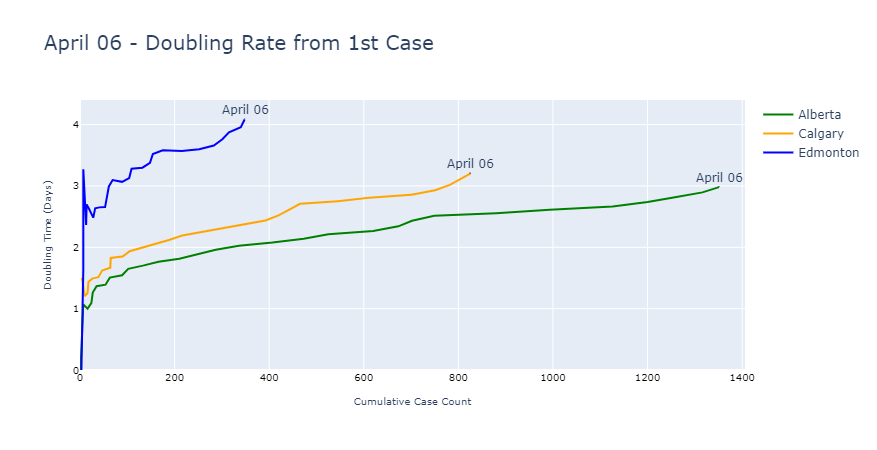

In [ ]:
# Set up the defaults and the data
ln_width = 2
days_to_trim = 1
mode = 'lines'
trace_formats = {'Alberta': {'x_data': 'Ab_cumCases',
                             'y_data': 'Ab_dtime',
                             'mode': mode,
                             'line': {'color': 'green', 'width':ln_width}}, 
                 'Calgary': {'x_data': 'Calgary_cumulative',
                             'y_data': 'Calgary_dtime',
                             'mode': mode,
                             'line': {'color': 'orange', 'width':ln_width}},  
                 'Edmonton': {'x_data': 'Edmont_cumulative',
                              'y_data': 'Edmont_dtime',
                              'mode': mode,
                              'line': {'color': 'blue', 'width':ln_width}}
                } 
plot_data = all_data[:-days_to_trim]
updated = plot_data.index[-1].strftime("%B %d")
# Create the plot
fig = go.Figure()
annotations = list()
for key in trace_formats.keys():
    fig.add_trace(go.Scatter(x=plot_data[trace_formats[key]['x_data']], y=plot_data[trace_formats[key]['y_data']],
                             mode=trace_formats[key]['mode'], line=trace_formats[key]['line'],
                             name=key, hovertemplate='dt: %{y: 0.2f}'
                             ),
                 )
    last_x = plot_data[trace_formats[key]['x_data']][-1]
    last_y = plot_data[trace_formats[key]['y_data']][-1]
    last_day = plot_data.index[-1].strftime("%B %d")
    annotations.append(dict(x=last_x, y=last_y, xref='x', yref='y', text=last_day, 
                            showarrow=True, ax=0, ay=-10))
fig.update_layout(dict(title=f'{updated} - Doubling Rate from 1st Case', titlefont={'size':20},
                        xaxis=dict(title='Cumulative Case Count', titlefont={'size': 10}, 
                                   rangemode='nonnegative', tick0=0, dtick=200,
                                   tickfont={'color':'black', 'size':10}),
                        yaxis=dict(title='Doubling Time (Days)', titlefont={'size': 10}, 
                                   tickfont={'color':'black', 'size':10}, side='left',
                                   rangemode='nonnegative', tick0=0, dtick=1),
                        legend_orientation="v", hovermode='x', annotations=annotations ))
fig.show()
fig.write_html('images/doubling_time.html')

In [ ]:
# days_to_trim = 1
# trim = days_to_trim + 1
# fig, ax = plt.subplots(figsize=(8,6))
# c_ab, c_calg, c_edm = 'green', 'orange', 'blue'

# ax.plot(abTotal['cum_cases'].values[:-days_to_trim], total_dt['dtime_rw'].values[:-days_to_trim], 
#         c=c_ab, label='Alberta')
# ax.plot(region_cum['Calgary_cumCases'].values[:-days_to_trim], region_dt['Calgary_dtime_rw'].values[:-days_to_trim], 
#         c=c_calg, label='Calgary')
# ax.plot(region_cum['Edmont_cumCases'].values[:-days_to_trim], region_dt['Edmont_dtime_rw'].values[:-days_to_trim], 
#         c=c_edm, label='Edmonton')

# # annotate Alberta
# ab_date = abTotal['cum_cases'].index[-trim].month_name() + ' ' + str(abTotal['cum_cases'].index[-trim].day)
# ab_cases = abTotal['cum_cases'][-trim]
# ab_dt = total_dt['dtime_rw'][-trim]
# ax.plot([ab_cases], [ab_dt], 'o', c=c_ab)
# ax.text(ab_cases - 40, ab_dt + 0.15, ab_date, 
#         fontdict={'color': c_ab, 'size': 8, 'weight': 'bold'})
# # annotate Calgary
# cal_date = region_cum['Calgary_cumCases'].index[-trim].month_name() + ' ' + str(region_cum['Calgary_cumCases'].index[-trim].day)
# cal_cases = region_cum['Calgary_cumCases'][-trim]
# cal_dt = region_dt['Calgary_dtime_rw'][-trim]
# ax.plot([cal_cases], [cal_dt], 'o', c=c_calg)
# ax.text(cal_cases - 40, cal_dt + 0.15, cal_date, 
#         fontdict={'color': c_calg, 'size': 8, 'weight': 'bold'})
# # annotate Edmonton
# edm_date = region_cum['Edmont_cumCases'].index[-trim].month_name() + ' ' + str(region_cum['Edmont_cumCases'].index[-trim].day)
# edm_cases = region_cum['Edmont_cumCases'][-trim]
# edm_dt = region_dt['Edmont_dtime_rw'][-trim]
# ax.plot([edm_cases], [edm_dt], 'o', c=c_edm)
# ax.text(edm_cases - 40, edm_dt + 0.15, edm_date, 
#         fontdict={'color': c_edm, 'size': 8, 'weight': 'bold'})
# # fancy up the plot
# ax.grid(which='both', linestyle=(0, (5, 3)), lw=0.5)
# ax.legend(frameon=True, fancybox=True, shadow=True)
# ax.set_ylabel('Doubling Time (Days)', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
# ax.set_xlabel('Cumulative Case Count', fontdict={'size': 9, 'family': 'sans-serif', 'style':'italic'})
# ax.set_title("Alberta: 6 Day Rolling Window - Doubling Time by Cumulative Cases",
#              fontdict={'fontsize': 10, 'family': 'sans-serif', 'fontweight': 'bold'})
# #fig.savefig('images/AlbertaDTimeIncreaseRW_byCaseCount.png', bbox_inches='tight')